<a href="https://colab.research.google.com/github/weraines/nfl_model/blob/master/su_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read In Data

# New Section

In [0]:
import numpy as np
import pandas as pd

#Change below based on what the current week of the NFL season is
curr_week = 11

df_week10 = pd.read_csv('dvoa1.csv')

df_w10train = df_week10[df_week10.week != curr_week]
df_w10train = df_w10train.drop('elo_prob1', axis=1)

df_w10pred = df_week10[df_week10.week == curr_week]
df_w10pred = df_w10pred.drop(['team_score', 'opp_score', 'winner','total', 
                              'margin','elo_prob1'], axis=1)

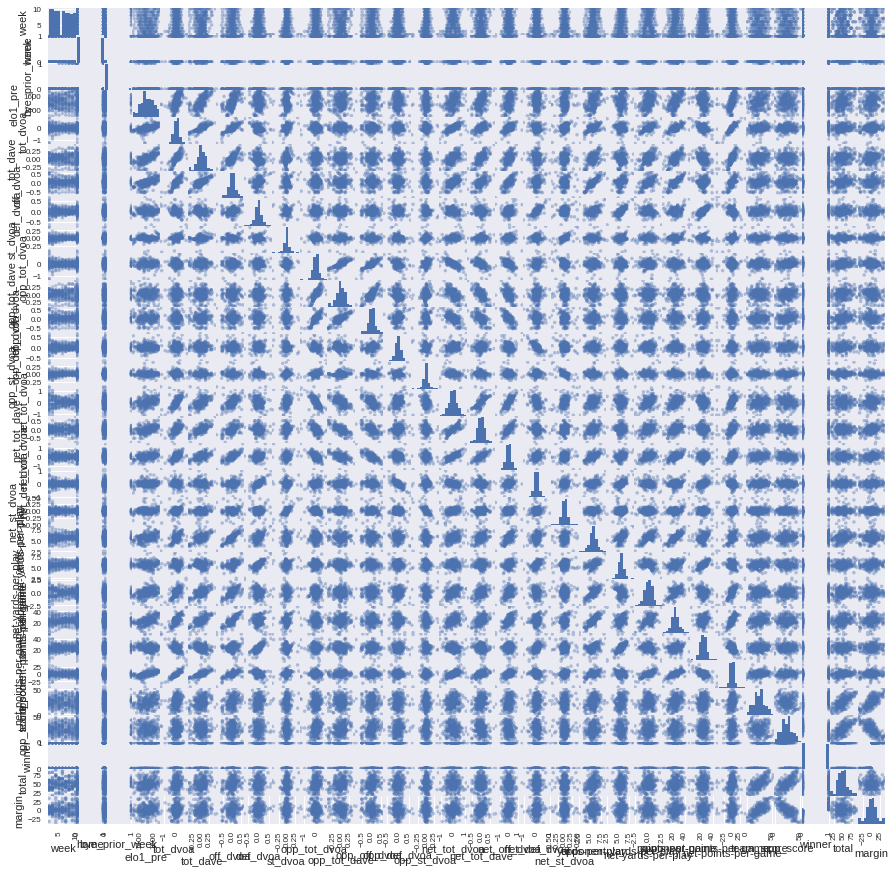

In [2]:
_ = pd.plotting.scatter_matrix(df_w10train, alpha=0.4,figsize=(15,15))

In [0]:
array = df_w10train.values

In [4]:
df_w10train.head()

,week,team,opponent,home,bye_prior_week,elo1_pre,tot_dvoa,tot_dave,off_dvoa,def_dvoa,...,opponent-yards-per-play,net-yards-per-play,points-per-game,opponent-points-per-game,net-points-per-game,team_score,opp_score,winner,total,margin
0,2,ARI,LAR,0,0,1445.574198,-0.38,-0.08,-0.33,0.16,...,5.7,-1.5,6.0,24.0,-18.0,0.0,34.0,0.0,34.0,-34.0
1,2,ATL,CAR,1,0,1587.848622,-0.36,0.00,-0.44,-0.07,...,3.6,1.0,12.0,18.0,-6.0,31.0,24.0,1.0,55.0,7.0
2,2,BAL,CIN,0,0,1561.692326,0.80,0.12,0.22,-0.66,...,2.5,2.5,47.0,3.0,44.0,23.0,34.0,0.0,57.0,-11.0
3,2,BUF,LAC,1,0,1475.794344,-1.31,-0.34,-0.85,0.34,...,5.0,-2.5,3.0,47.0,-44.0,20.0,31.0,0.0,51.0,-11.0
4,2,CAR,ATL,0,0,1567.174456,0.24,0.01,0.13,-0.06,...,4.1,0.7,16.0,8.0,8.0,24.0,31.0,0.0,55.0,-7.0


In [0]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_win = array[:,3:27]
y_win = array[:,29]
y_win=y_win.astype('int')
validation_size = 0.20
seed = 7
X_win_train, X_win_test, y_win_train, y_win_test \
= model_selection.train_test_split(X_win, y_win, 
                                   test_size=validation_size, 
                                   random_state=seed)

In [6]:
from sklearn.metrics import accuracy_score

def run_model(model, alg_name):
    # build the model on training data
    model.fit(X_win_train, y_win_train)

    # make predictions for test data
    y_pred = model.predict(X_win_test)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_win_test, y_pred) * 100
    print(alg_name + ": " + str(accuracy))

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
run_model(model, "Decision Tree")

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 4, random_state = 7)
run_model(model, "Random Forest")

# ----- xgboost ------------
from xgboost import XGBClassifier

model = XGBClassifier()
run_model(model, "XGBoost")

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
run_model(model, "SVM Classifier")

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
run_model(model, "Nearest Neighbors Classifier")

# ---------- SGD Classifier -----------------
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(SGDClassifier())
run_model(model, "SGD Classifier")

Decision Tree: 64.15094339622641
Random Forest: 64.15094339622641
XGBoost: 64.15094339622641
SVM Classifier: 45.28301886792453
Nearest Neighbors Classifier: 49.056603773584904
SGD Classifier: 47.16981132075472


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [0]:
rand = RandomForestClassifier(n_estimators = 4, random_state = 7)

boost = XGBClassifier()

d_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)


model_r = rand.fit(X_win_train, y_win_train)
model_b = boost.fit(X_win_train, y_win_train)
model_t = d_tree.fit(X_win_train, y_win_train)

In [9]:
df_w10pred.head()

,week,team,opponent,home,bye_prior_week,elo1_pre,tot_dvoa,tot_dave,off_dvoa,def_dvoa,...,net_tot_dave,net_off_dvoa,net_def_dvoa,net_st_dvoa,yards-per-play,opponent-yards-per-play,net-yards-per-play,points-per-game,opponent-points-per-game,net-points-per-game
264,11,ARI,OAK,1,0,1386.964811,-0.295,-0.278,-0.382,-0.093,...,0.035,-0.306,-0.266,0.033,4.3,5.3,-1.0,13.8,24.9,-11.1
265,11,ATL,DAL,1,0,1545.987979,-0.087,-0.079,0.142,0.233,...,0.050,0.232,0.219,0.024,6.5,6.3,0.2,28.5,28.2,0.3
266,11,BAL,CIN,1,1,1542.393738,0.145,0.139,0.046,-0.095,...,0.241,0.053,-0.160,0.003,5.2,4.8,0.4,23.7,17.8,5.9
267,11,CAR,DET,0,0,1584.099132,0.094,0.103,0.127,0.058,...,0.331,0.186,-0.129,0.045,6.0,5.6,0.4,27.5,22.5,5.0
268,11,CHI,MIN,1,0,1545.991680,0.229,0.226,0.079,-0.201,...,0.201,0.107,-0.117,-0.026,5.6,5.1,0.5,29.4,19.1,10.3


In [10]:
array_pred = df_w10pred.values

X_pred = array_pred[:,3:]

w10_preds_rand = rand.predict(X_pred)
w10_preds_boost = boost.predict(X_pred)
w10_preds_tree = d_tree.predict(X_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
df_w10pred['w10_pred_rand'] = w10_preds_rand
df_w10pred['w10_pred_boost'] = w10_preds_boost
df_w10pred['w10_preds_tree'] = w10_preds_tree

In [0]:
df_w10pred.to_csv('week10_wins.csv', index=False)

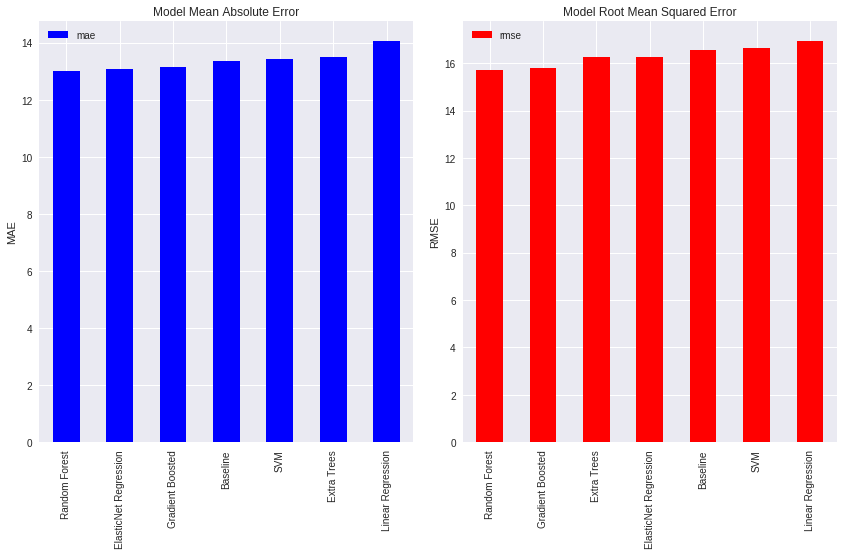

In [12]:
y_margin = array[:,30]
y_margin = y_margin.astype('int')
validation_size = 0.20
seed = 7
X_marg_train, X_marg_test, y_marg_train, y_marg_test = model_selection.train_test_split(X_win, y_margin, 
                                 test_size=validation_size, random_state=seed)

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
import pymc3 as pm


# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_marg_train, X_marg_test, y_marg_train, y_marg_test)

  # Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', 
                                                      color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [0]:
line_r = LinearRegression()
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
gboost = GradientBoostingRegressor(n_estimators=20)

line_r.fit(X_marg_train, y_marg_train)
elastic.fit(X_marg_train, y_marg_train)
gboost.fit(X_marg_train, y_marg_train)

w10_preds_line = line_r.predict(X_pred)
w10_preds_elas = elastic.predict(X_pred)
w10_preds_gboost = gboost.predict(X_pred)
 
df_w10pred['w10_preds_line_tot'] = w10_preds_line
df_w10pred['w10_preds_elas_tot'] = w10_preds_elas
df_w10pred['w10_preds_gboost_tot'] = w10_preds_gboost

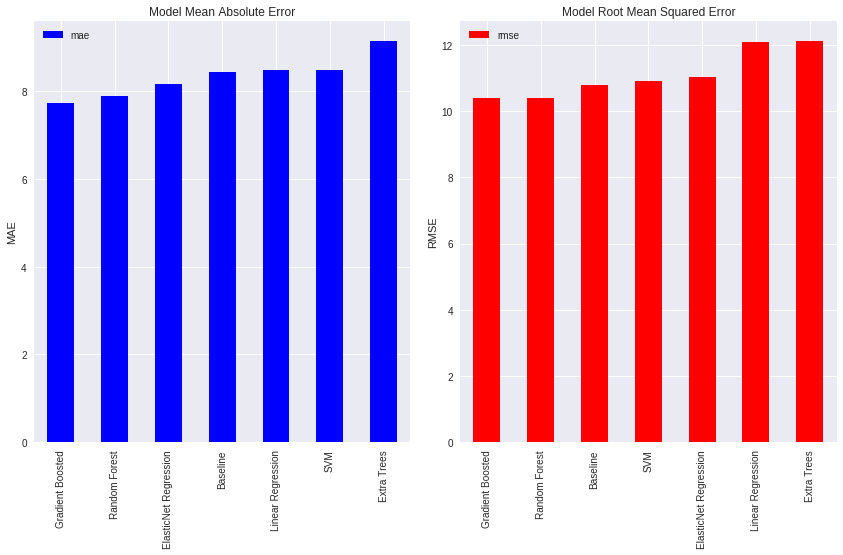

In [14]:
y_margin = array[:,31]
y_margin = y_margin.astype('int')
validation_size = 0.20
seed = 7
X_marg_train, X_marg_test, y_marg_train, y_marg_test = model_selection.train_test_split(X_win, y_margin, 
                                 test_size=validation_size, random_state=seed)

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
import pymc3 as pm


# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_marg_train, X_marg_test, y_marg_train, y_marg_test)

  # Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', 
                                                      color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [0]:
line_r = RandomForestRegressor(n_estimators=50)
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)
gboost = GradientBoostingRegressor(n_estimators=20)

line_r.fit(X_marg_train, y_marg_train)
elastic.fit(X_marg_train, y_marg_train)
gboost.fit(X_marg_train, y_marg_train)

w10_preds_line = line_r.predict(X_pred)
w10_preds_elas = elastic.predict(X_pred)
w10_preds_gboost = gboost.predict(X_pred)
 
df_w10pred['w10_preds_line_mar'] = w10_preds_line
df_w10pred['w10_preds_elas_mar'] = w10_preds_elas
df_w10pred['w10_preds_gboost_mar'] = w10_preds_gboost

In [0]:
df_w10pred.to_csv('week11_preds.csv', index=False)